In [1]:
import json
import pandas as pd

# ZKM data from Coding da Vinci BW 2022

Basic exploration of the dataset.

* Loading a JSON file
* Which columns exists?
* Selecting data
* Grouping data
* Plotting data


In [2]:
with open("export.json") as f:
    data = json.load(f)

In [3]:
data.keys()

dict_keys(['data', 'metadata'])

In [4]:
data["data"].keys()

dict_keys(['bibliothek_ausleihe_ausgang-eingang', 'aufzug_summe-hoehenmeter-positiv', 'aufzug_fahrten', 'publikationen_woerter_lektoriert', 'austellung_biomedia-co2', 'austellung_biomedia-hum', 'austellung_biomedia-pm25', 'austellung_biomedia-pm10', 'austellung_biomedia-press', 'austellung_biomedia-temp', 'austellung_biomedia-crawler_comments', 'austellung_biomedia-crawler_involved_profiles', 'austellung_biomedia-crawler_post_images', 'austellung_biomedia-crawler_posts', 'austellung_biomedia-crawler_reactions', 'austellung_biomedia-cwa_devs', 'austellung_biomedia-cwa_rssi', 'wissen_archiv_akte', 'wissen_archiv_objekte', 'wissen_lavs_digitalisierung', 'webseite_veranstaltungen', 'besucherzahlen'])

In [5]:
data["data"]["bibliothek_ausleihe_ausgang-eingang"][:2]

[{'date': '2022-03-01T00:00:00',
  'uid': 'Ar 0029',
  'title': 'Social Media in Archiven : Grundlagen, Einsatzmöglichkeiten, Zielsetzungen / Gisa Spiegel. - 2013',
  'incoming': True,
  'outgoing': False,
  'timestamp': 1646089200},
 {'date': '2022-03-01T00:00:00',
  'uid': 'B Bure50 0017',
  'title': "Buren : exposition du 17 mai au 29 septembre 1991 dossier de press, documents / capcMusée d'art contemporain Entrepôt Bordeaux. - 1991",
  'incoming': True,
  'outgoing': False,
  'timestamp': 1646089200}]

In [6]:
df = pd.DataFrame(data["data"]["bibliothek_ausleihe_ausgang-eingang"])

In [7]:
df

,date,uid,title,incoming,outgoing,timestamp
0,2022-03-01T00:00:00,Ar 0029,"Social Media in Archiven : Grundlagen, Einsatz...",True,False,1646089200
1,2022-03-01T00:00:00,B Bure50 0017,Buren : exposition du 17 mai au 29 septembre 1...,True,False,1646089200
2,2022-03-01T00:00:00,B Duc25 0070,Readymade century / Dieter Daniels ; mit einem...,True,False,1646089200
3,2022-03-01T00:00:00,B Guen95 0001,Michael Günzburger : Now let it unfold / Galer...,True,False,1646089200
4,2022-03-01T00:00:00,B Gut70 0001,Joachim Gutsche : Bilder der 1960er Jahre / Te...,True,False,1646089200
...,...,...,...,...,...,...
1141,2022-03-31T00:00:00,XSH L 0218,Über Peter Weiss / hrsg. von Volker Canaris. -...,True,False,1648677600
1142,2022-03-31T00:00:00,ZKM AUS The Beauty of Early Life,Evolutionsbiologie / Volker Storch; Ulrich Wel...,True,False,1648677600
1143,2022-03-31T00:00:00,ZKM AUS The Beauty of Early Life,¬Das¬ Geheimnis um die erste Zelle : dem Ursp...,True,False,1648677600
1144,2022-03-31T00:00:00,"ZT 004 63.2022,4",Theater heute : die Theaterzeitschrift. - 63 (...,True,False,1648677600


In [8]:
df["date"] = pd.to_datetime(df["date"])

In [9]:
inout = df.groupby("date").sum()

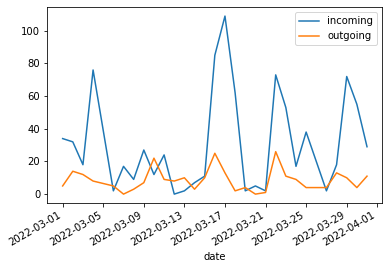

In [10]:
inout[["incoming", "outgoing"]].plot()